# ShowTime Project

## Context
An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at 121.61 billion dollars in 2019 and is projected to reach 1,039.03 billion dollars by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

## Objective
ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

 

## Data Description
The data contains the different factors to analyze for the content. The detailed data dictionary is given below.

**Data Dictionary**

- visitors: Number of visitors, in millions, to the platform in the past week
- ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
- major_sports_event: Any major sports event on the day
- genre: Genre of the content
- dayofweek: Day of the release of the content
- season: Season of the release of the content
- views_trailer: Number of views, in millions, of the content trailer
- views_content: Number of first-day views, in millions, of the content

## Importing necessary libraries and data

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlibinline

UsageError: Line magic function `%matplotlibinline` not found.


## Data Overview

- Observations
- Sanity checks

In [10]:
df = pd.read_csv("ottdata.csv")
df.isnull().sum()
df.head()
df.corr()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
visitors,1.000000,0.030472,-0.039494,-0.028930,0.259136
ad_impressions,0.030472,1.000000,-0.034371,0.009446,0.050022
major_sports_event,-0.039494,-0.034371,1.000000,0.048630,-0.236014
views_trailer,-0.028930,0.009446,0.048630,1.000000,0.753962
views_content,0.259136,0.050022,-0.236014,0.753962,1.000000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of content views look like?
2. What does the distribution of genres look like?
3. The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?
4. How does the viewership vary with the season of release?
5. What is the correlation between trailer views and content views?

<AxesSubplot:xlabel='views_trailer', ylabel='views_content'>

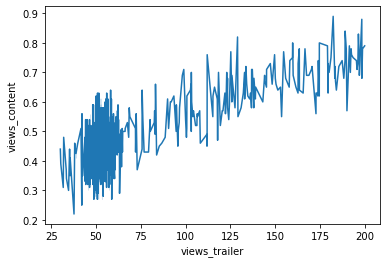

In [11]:

df.corr()
#sns.barplot(x=list(df['genre'].unique()),y=list(df['genre'].value_counts()))
#sns.displot(df['views_content'])
#sns.barplot(x=df['dayofweek'],y=df['visitors'])
#sns.barplot(x=df['season'],y=df['visitors'])
sns.lineplot(x=df['views_trailer'],y=df['views_content'])

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [12]:
df.isna().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

In [13]:
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

In [14]:
df.nunique()

visitors               56
ad_impressions         80
major_sports_event      2
genre                   8
dayofweek               7
season                  4
views_trailer         799
views_content          61
dtype: int64

In [15]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.000,NaN,NaN,NaN,1.704,0.232,1.250,1.550,1.700,1.830,2.340
ad_impressions,1000.000,NaN,NaN,NaN,1434.712,289.535,1010.870,1210.330,1383.580,1623.670,2424.200
major_sports_event,1000.000,NaN,NaN,NaN,0.400,0.490,0.000,0.000,0.000,1.000,1.000
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.000,NaN,NaN,NaN,66.916,35.001,30.080,50.948,53.960,57.755,199.920
views_content,1000.000,NaN,NaN,NaN,0.473,0.106,0.220,0.400,0.450,0.520,0.890


## EDA

- It is a good idea to explore the data once again after manipulating it.

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
visitors,1.000,0.030,-0.039,-0.029,0.259
ad_impressions,0.030,1.000,-0.034,0.009,0.050
major_sports_event,-0.039,-0.034,1.000,0.049,-0.236
views_trailer,-0.029,0.009,0.049,1.000,0.754
views_content,0.259,0.050,-0.236,0.754,1.000


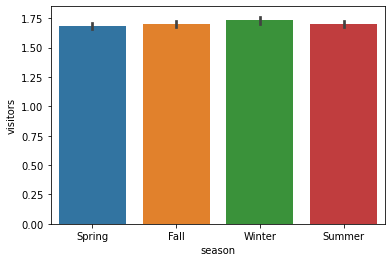

In [16]:
sns.barplot(x=df['season'],y=df['visitors'])
df.corr()

In [17]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(feature.mean(), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(feature.median(), color='black', linestyle='-') 
    

C:\Users\slowb\PythonFolderAnaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\slowb\PythonFolderAnaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


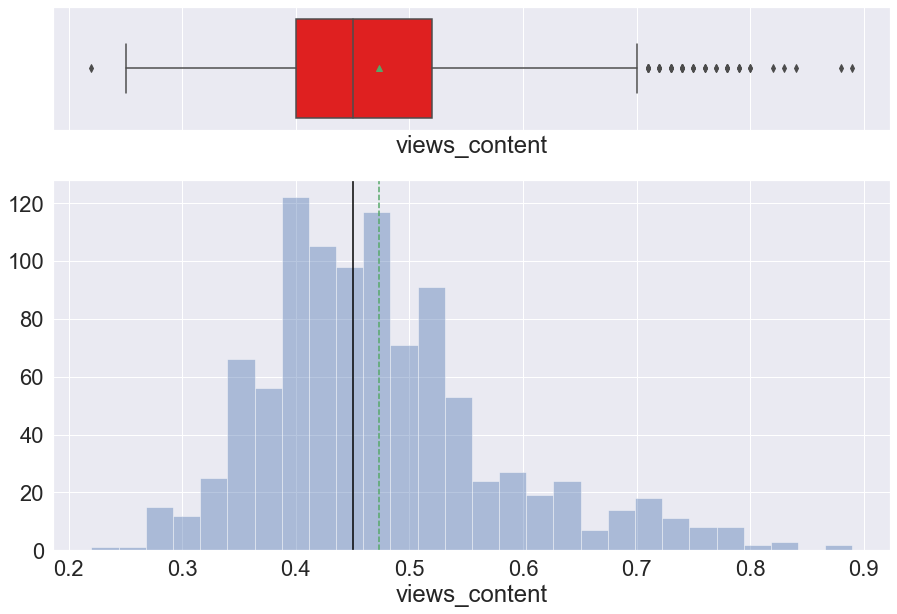

In [18]:
histogram_boxplot(df.views_content)

C:\Users\slowb\PythonFolderAnaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\slowb\PythonFolderAnaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


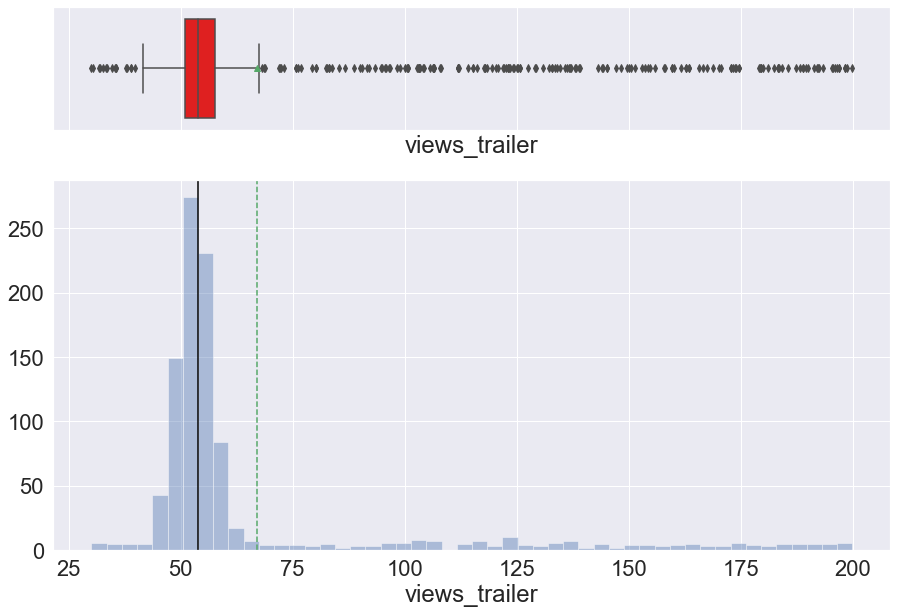

In [19]:
histogram_boxplot(df.views_trailer)

In [20]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.670,1113.810,0,Horror,Wednesday,Spring,56.700,0.510
1,1.460,1498.410,1,Thriller,Friday,Fall,52.690,0.320
2,1.470,1079.190,1,Thriller,Wednesday,Fall,48.740,0.390
3,1.850,1342.770,1,Sci-Fi,Friday,Fall,49.810,0.440
4,1.460,1498.410,0,Sci-Fi,Sunday,Winter,55.830,0.460


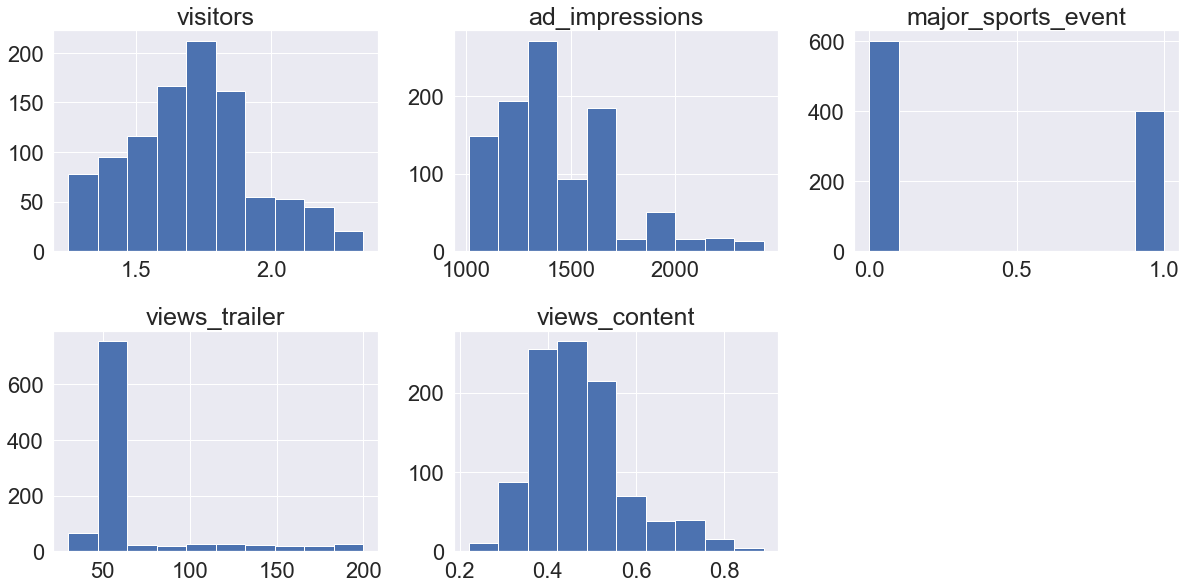

In [21]:
#major_sports_event      2
#genre                   8
#dayofweek               7
#season                  4
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
#all_col.remove('major_sports_event')
#all_col.remove('genre')
#all_col.remove('dayofweek')
#all_col.remove('season')
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.histplot(df[all_col[i]], kde=True)   #you can comment the previous line and run this one to get distribution curves too
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

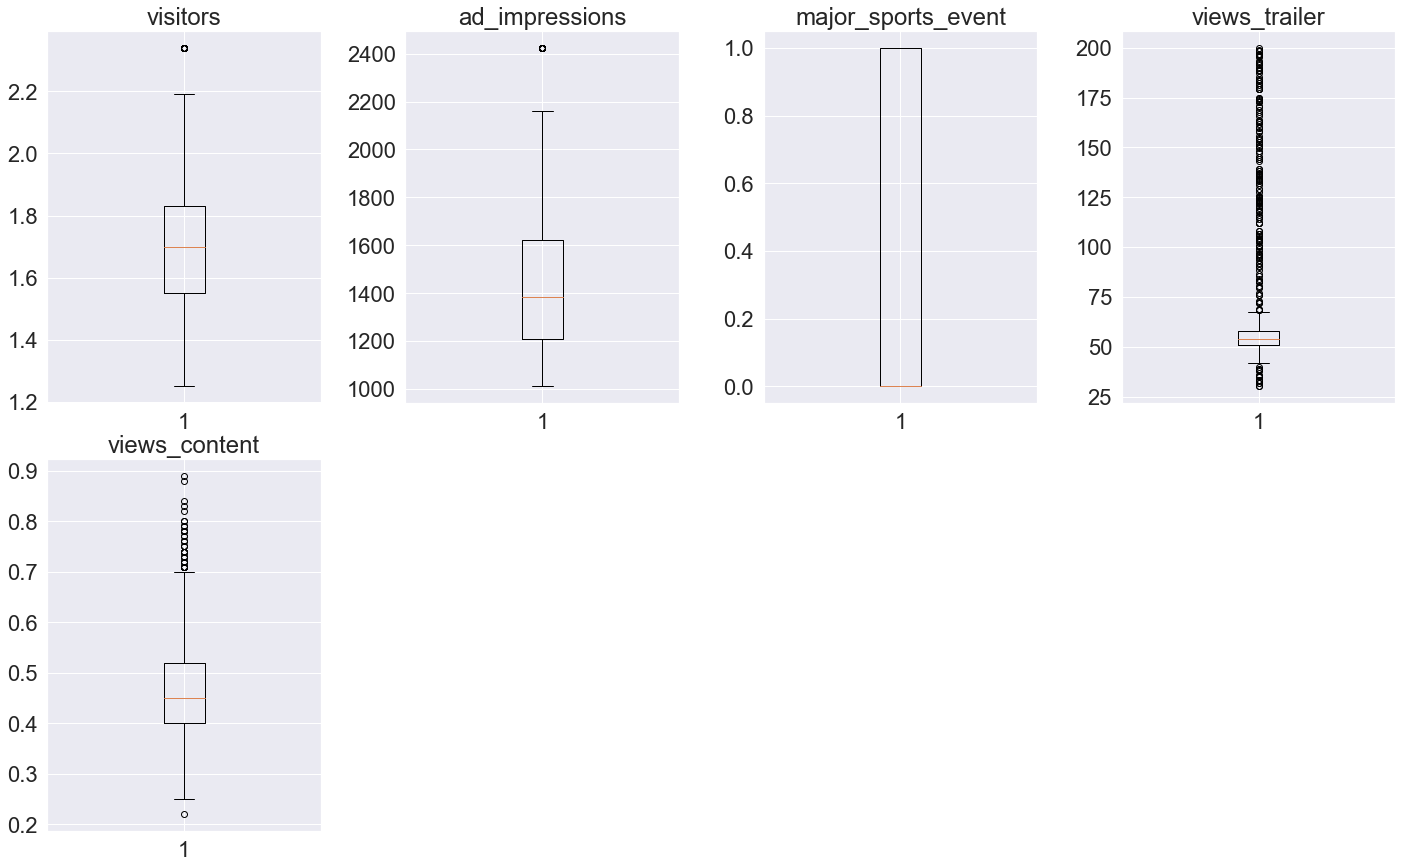

In [22]:
# lets plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

## Building a Linear Regression model

In [23]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [24]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

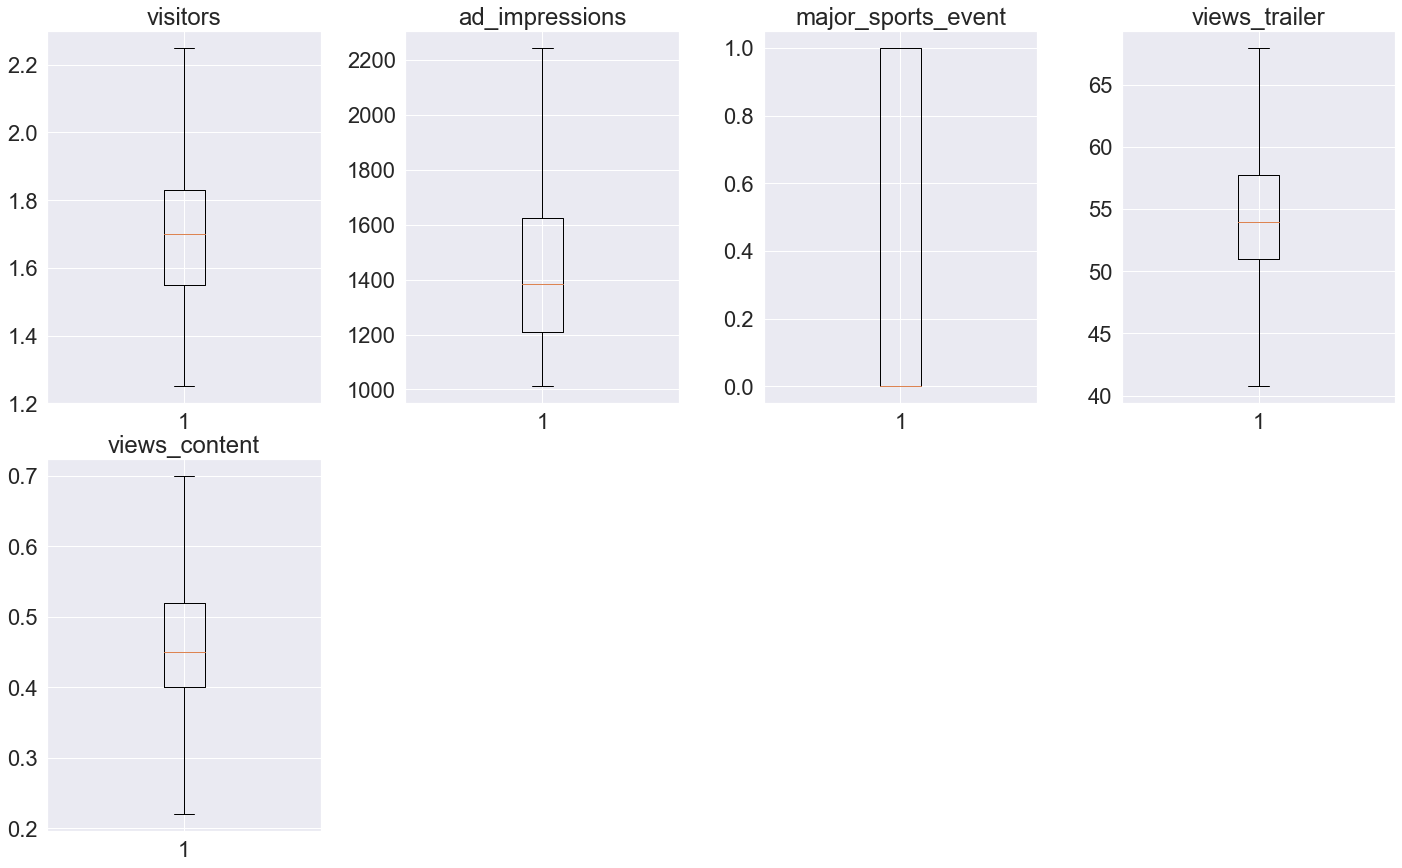

In [25]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [26]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.670,1113.810,0,Horror,Wednesday,Spring,56.700,0.510
1,1.460,1498.410,1,Thriller,Friday,Fall,52.690,0.320
2,1.470,1079.190,1,Thriller,Wednesday,Fall,48.740,0.390
3,1.850,1342.770,1,Sci-Fi,Friday,Fall,49.810,0.440
4,1.460,1498.410,0,Sci-Fi,Sunday,Winter,55.830,0.460


In [27]:
X = df.drop(['views_content', 'genre', 'major_sports_event'], axis=1)
y = df['views_content']

print(X.head())
print(y.head())

   visitors  ad_impressions  dayofweek  season  views_trailer
0     1.670        1113.810  Wednesday  Spring         56.700
1     1.460        1498.410     Friday    Fall         52.690
2     1.470        1079.190  Wednesday    Fall         48.740
3     1.850        1342.770     Friday    Fall         49.810
4     1.460        1498.410     Sunday  Winter         55.830
0   0.510
1   0.320
2   0.390
3   0.440
4   0.460
Name: views_content, dtype: float64


In [28]:
print(X.shape)
print(y.shape)

(1000, 5)
(1000,)


In [29]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.670,1113.810,0,Horror,Wednesday,Spring,56.700,0.510
1,1.460,1498.410,1,Thriller,Friday,Fall,52.690,0.320
2,1.470,1079.190,1,Thriller,Wednesday,Fall,48.740,0.390
3,1.850,1342.770,1,Sci-Fi,Friday,Fall,49.810,0.440
4,1.460,1498.410,0,Sci-Fi,Sunday,Winter,55.830,0.460


In [30]:
X = pd.get_dummies(X, columns=['dayofweek', 'season'], drop_first=True)
X.head()

,visitors,ad_impressions,views_trailer,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.670,1113.810,56.700,0,0,0,0,0,1,1,0,0
1,1.460,1498.410,52.690,0,0,0,0,0,0,0,0,0
2,1.470,1079.190,48.740,0,0,0,0,0,1,0,0,0
3,1.850,1342.770,49.810,0,0,0,0,0,0,0,0,0
4,1.460,1498.410,55.830,0,0,1,0,0,0,0,0,1


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#from sklearn.linear_model import LinearRegression
#lm = LinearRegression()
#lm.fit(X_train,y_train)
#predictions=lm.predict(X_test)

In [32]:
X_train.head()

,visitors,ad_impressions,views_trailer,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
541,2.140,1113.810,50.780,0,0,0,0,0,0,0,0,1
440,1.690,1079.190,67.966,0,0,0,0,0,0,0,0,1
482,1.930,1357.740,50.740,0,0,0,0,0,0,0,0,0
422,1.570,1557.200,47.910,0,0,0,0,0,0,0,1,0
778,1.540,1231.300,58.010,0,0,0,0,0,1,0,0,1


In [33]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.670,1113.810,0,Horror,Wednesday,Spring,56.700,0.510
1,1.460,1498.410,1,Thriller,Friday,Fall,52.690,0.320
2,1.470,1079.190,1,Thriller,Wednesday,Fall,48.740,0.390
3,1.850,1342.770,1,Sci-Fi,Friday,Fall,49.810,0.440
4,1.460,1498.410,0,Sci-Fi,Sunday,Winter,55.830,0.460


In [34]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)    

Intercept of the linear equation: -0.3050752009880831

COefficients of the equation are: [1.31411223e-01 8.04165714e-06 8.89282352e-03 3.77471182e-02
 4.86324986e-02 3.31750745e-02 2.52488206e-02 4.65838094e-02
 3.96435571e-02 2.22609205e-02 4.39057721e-02 2.70722093e-02]


## Model performance evaluation

In [35]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)

0.05231024711907485

In [36]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

0.0674566777719165

In [37]:
r2_score(y_test, pred)

0.5328652318263891

In [38]:

linearregression.score(X_train, y_train)  # 70 % data 

0.5407891125190398

In [39]:
linearregression.score(X_test, y_test)

0.5328652318263891

In [40]:
#Training and testing data are below 70% which means that unfortunately the model is not satisfactory.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [41]:

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     67.42
Date:                Sun, 25 Dec 2022   Prob (F-statistic):          1.55e-107
Time:                        20:51:32   Log-Likelihood:                 899.83
No. Observations:                 700   AIC:                            -1774.
Df Residuals:                     687   BIC:                            -1714.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3051    

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))


Series before feature selection: 

const                 153.964
visitors                1.010
ad_impressions          1.007
views_trailer           1.009
dayofweek_Monday        1.044
dayofweek_Saturday      1.135
dayofweek_Sunday        1.108
dayofweek_Thursday      1.145
dayofweek_Tuesday       1.045
dayofweek_Wednesday     1.272
season_Spring           1.502
season_Summer           1.505
season_Winter           1.523
dtype: float64



In [43]:
X_train2 = X_train1.drop('dayofweek_Wednesday', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                150.826
visitors               1.020
ad_impressions         1.007
views_trailer          1.006
dayofweek_Monday       1.013
dayofweek_Saturday     1.031
dayofweek_Sunday       1.035
dayofweek_Thursday     1.047
dayofweek_Tuesday      1.022
season_Spring          1.533
season_Summer          1.515
season_Winter          1.573
dtype: float64



In [44]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     65.85
Date:                Sun, 25 Dec 2022   Prob (F-statistic):          9.08e-100
Time:                        20:51:39   Log-Likelihood:                 879.18
No. Observations:                 700   AIC:                            -1734.
Df Residuals:                     688   BIC:                            -1680.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2807      0

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 153.964
visitors                1.010
ad_impressions          1.007
views_trailer           1.009
dayofweek_Monday        1.044
dayofweek_Saturday      1.135
dayofweek_Sunday        1.108
dayofweek_Thursday      1.145
dayofweek_Tuesday       1.045
dayofweek_Wednesday     1.272
season_Spring           1.502
season_Summer           1.505
season_Winter           1.523
dtype: float64



In [47]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_train1.drop('season_Winter', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                 152.933
visitors                1.010
ad_impressions          1.007
views_trailer           1.005
dayofweek_Monday        1.040
dayofweek_Saturday      1.128
dayofweek_Sunday        1.121
dayofweek_Thursday      1.155
dayofweek_Tuesday       1.050
dayofweek_Wednesday     1.276
season_Spring           1.129
season_Summer           1.132
dtype: float64



In [48]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     70.92
Date:                Sun, 25 Dec 2022   Prob (F-statistic):          1.75e-105
Time:                        20:53:32   Log-Likelihood:                 892.72
No. Observations:                 700   AIC:                            -1761.
Df Residuals:                     688   BIC:                            -1707.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3025    

In [49]:
#r-squared value went up which is great!

In [50]:
#What if we drop season_summer

In [52]:
# we drop the one with the highest vif values
X_train3 = X_train1.drop('season_Summer', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

const                 151.146
visitors                1.021
ad_impressions          1.007
views_trailer           1.006
dayofweek_Monday        1.041
dayofweek_Saturday      1.127
dayofweek_Sunday        1.117
dayofweek_Thursday      1.164
dayofweek_Tuesday       1.042
dayofweek_Wednesday     1.274
season_Spring           1.156
season_Winter           1.173
dtype: float64



In [54]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     67.15
Date:                Sun, 25 Dec 2022   Prob (F-statistic):          3.00e-101
Time:                        20:56:17   Log-Likelihood:                 882.69
No. Observations:                 700   AIC:                            -1741.
Df Residuals:                     688   BIC:                            -1687.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2846    

In [57]:
#R-squared value not as good so other one is better, we will proceed with olsmod1

In [61]:
#Dropping season_Spring because it is the highest p-value above 0.05
X_train4 = X_train2.drop(['season_Spring'], axis=1)

In [62]:
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     77.76
Date:                Sun, 25 Dec 2022   Prob (F-statistic):          4.52e-106
Time:                        20:59:55   Log-Likelihood:                 891.85
No. Observations:                 700   AIC:                            -1762.
Df Residuals:                     689   BIC:                            -1712.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2970    

In [64]:
#dropping ad_impressions because it is the highest p-value above 0.05
X_train5 = X_train4.drop(['ad_impressions'], axis=1)

In [65]:
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     86.32
Date:                Sun, 25 Dec 2022   Prob (F-statistic):          7.29e-107
Time:                        21:01:31   Log-Likelihood:                 891.41
No. Observations:                 700   AIC:                            -1763.
Df Residuals:                     690   BIC:                            -1717.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2848    

In [66]:
#dropping dayofweek_Monday because hihgest p-value greater than 0.05
X_train6 = X_train5.drop(['dayofweek_Monday'], axis=1)

In [67]:
olsmod5 = sm.OLS(y_train, X_train6)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     96.25
Date:                Sun, 25 Dec 2022   Prob (F-statistic):          4.60e-107
Time:                        21:02:28   Log-Likelihood:                 889.51
No. Observations:                 700   AIC:                            -1761.
Df Residuals:                     691   BIC:                            -1720.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2822    

In [68]:
residual= olsres5.resid
np.mean(residual)

-7.390120261772738e-16

In [69]:
#very close to 0, which is good because mean of residuals should be 0

In [70]:
##Test for Linearity

In [71]:
residual=olsres5.resid
fitted=olsres5.fittedvalues #predicted values

C:\Users\slowb\PythonFolderAnaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


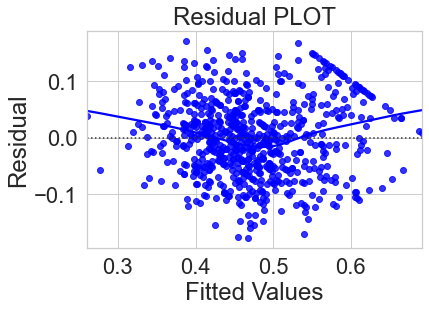

In [73]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="blue",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

In [74]:
#Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.
#No pattern in residual hence 1st assumptions is satisfied

In [75]:
##TEST FOR NORMALITY

C:\Users\slowb\PythonFolderAnaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


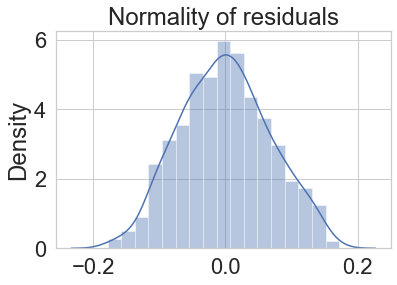

In [76]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

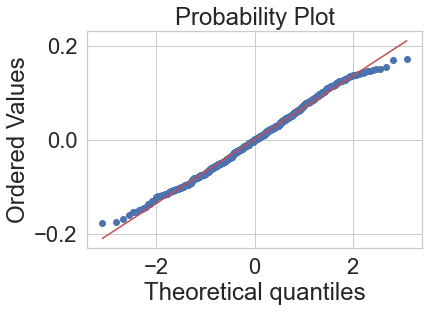

In [77]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [78]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9944761395454407, pvalue=0.012101123109459877)

In [79]:
#QQ PLOT and SHAPIRO Test show normality which is good

In [80]:
#TEST FOR HOMOSCEDACITY

In [82]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train6)
lzip(name, test)

[('F statistic', 1.0911627296816715), ('p-value', 0.2104638772892274)]

In [83]:
#Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

In [84]:
### Now we have checked all the assumptions and they are satisfied, so we can move towards prediction part

In [85]:
### Predicting on the test data

In [87]:
X_train6.columns

Index(['const', 'visitors', 'views_trailer', 'dayofweek_Saturday',
       'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Tuesday',
       'dayofweek_Wednesday', 'season_Summer'],
      dtype='object')

In [88]:
X_test_final = X_test[X_train6.columns]

In [89]:
X_test_final.head()

,const,visitors,views_trailer,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Summer
521,1.000,1.700,43.870,0,0,1,0,0,1
737,1.000,2.190,52.040,0,0,0,0,1,0
740,1.000,1.690,49.100,0,0,0,0,1,0
660,1.000,1.550,67.966,0,0,0,0,1,0
411,1.000,1.270,50.110,0,1,0,0,0,0


In [91]:
y_pred = olsres5.predict(X_test_final)

In [92]:
### Checking the performance on train and test: metric used - RMSE

In [93]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 0.0679037358692309
Test error: 0.0680650057310706


In [94]:
### Now we can finally see that we have low test and train error, also both the errors are comparable, so our model is not suffering from overfitting .
### Hence we can conclude the model "olsres5" is good for prediction as well as inference purpose

In [96]:
olsmod5 = sm.OLS(y_train, X_train6)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     96.25
Date:                Sun, 25 Dec 2022   Prob (F-statistic):          4.60e-107
Time:                        21:10:51   Log-Likelihood:                 889.51
No. Observations:                 700   AIC:                            -1761.
Df Residuals:                     691   BIC:                            -1720.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2822    

In [97]:
#Observations

In [98]:
#1. an increase in one unit of visitors leads to a .1354 increase in views
#2. The days show some significance, monday was emitted because the p value was too high. Season summer was also significant. All of these factors had similar significance
#3. an increase in one unit of views_trailer was the least significant factor, which means that viewing the trailer does not mean someone will watch the content. 
#4. Saturday was the most significant day, which makes sense. 


In [105]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [107]:
X.shape[1]

13

In [117]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 11,forward=True,
           floating=False, scoring= 'r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-12-25 21:24:50] Features: 1/11 -- score: 0.38319372320569356[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-12-25 21:24:50] Features: 2/11 -- score: 0.47577080521272636[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-12-25 21:24:50] Features: 3/11 -- score: 0.48623197810228247[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [118]:
#### We can see that Adjusted-R square starts decreasing after addition of 9th feature, so we will proceed only with best 8 features

In [119]:
clf = LinearRegression()

# # Build step forward feature selection
sfs1 = sfs(clf,k_features = 8,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-12-25 21:26:13] Features: 1/8 -- score: 0.38319372320569356[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-12-25 21:26:13] Features: 2/8 -- score: 0.47577080521272636[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-12-25 21:26:13] Features: 3/8 -- score: 0.48623197810228247[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [120]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 2, 4, 5, 6, 7, 8, 10]


In [121]:
X_train4.columns[feat_cols]

Index(['const', 'ad_impressions', 'dayofweek_Monday', 'dayofweek_Saturday',
       'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Tuesday',
       'season_Summer'],
      dtype='object')

In [122]:
### Now we will fit a sklearn model using these features only

In [123]:
X_train_final = X_train4[X_train4.columns[feat_cols]]

In [124]:
X_test.columns

Index(['const', 'visitors', 'ad_impressions', 'views_trailer',
       'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday',
       'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [125]:
#Creating new x_test with the same 18 variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [127]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train_final, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCoefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted = linearregression.predict(X_train_final)
pred = linearregression.predict(X_test_final)       

Intercept of the linear equation: 0.45054467730643055

Coefficients of the equation are: [0.00000000e+00 7.64690690e-06 8.26587914e-03 3.28867175e-02
 2.22629971e-02 1.04460377e-02 1.43703428e-02 2.20211424e-02]


In [128]:
# R2 Squared: on train and test
print('R^2 score on train data :', r2_score(y_train, predicted))
print('R^2 score on test data :', r2_score(y_test, pred))

R^2 score on train data : 0.020121200147778517
R^2 score on test data : 0.01883961093484221


In [129]:
# RMSE on train and test data
print('RMSE on train data :', mean_squared_error(y_train, predicted)**0.5)
print('RMSE on test data :', mean_squared_error(y_test, pred)**0.5)

RMSE on train data : 0.09773985057323158
RMSE on test data : 0.0977628504333489


In [ ]:
#Both  𝑅2  and RMSE shows that model fitted is bad(really terrible), and cannot be used for making predictions which is very sad

## Final Model Summary

In [ ]:
#Overall this model is really good because it can be used for good predictions as well as bad ones having 

## Actionable Insights and Recommendations

- 